In [1]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 9.3 MB/s eta 0:00:00


In [2]:
%pip install "zenml[server]"
!zenml integration install sklearn -y
%pip install pyparsing==2.4.2  #required for google colab
import IPython
IPython.Application.instance().kernel.do_shutdown(restart=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.6/525.6 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

NumExpr defaulting to 2 threads.
⠴ Installing integrations...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7


{'status': 'ok', 'restart': True}

In [1]:
NGROK_TOKEN="2ZUp3MroqSxJeR5e7HQ8Wbxc3Ei_3rywJQ6n7bs9dp1e68y5b"

In [2]:
from zenml.environment import Environment
if Environment.in_google_colab():
  !pip install pyngrok
  !ngrok authtoken {NGROK_TOKEN}

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


**ZenML Setup**

In [3]:
!rm -rf .zen
!zenml init

NumExpr defaulting to 2 threads.
Initializing the ZenML global configuration version to 0.52.0
Creating database tables
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠇ Initializing ZenML repository at /content.
⠏ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
Creating default workspace 'default' ...
Creating default stack in workspace default...
⠹ Initializing ZenML repository at /content.
Creating default user 'default' ...
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
Setting the global active workspace 

ML Code

In [4]:
import numpy as np
import pandas as pd
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def train_test() -> None:
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))

    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=False
    )

    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)

    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc}")

train_test()


Test accuracy: 0.9583333333333334


**ML pipelines with ZenML**

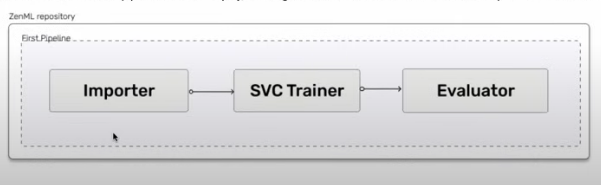

In [5]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
import numpy as np
from typing import Tuple

@step
def importer() -> Tuple[  #will return that will be accepted by
  Annotated[np.ndarray,"X_train"],
  Annotated[np.ndarray,"X_test"],
  Annotated[np.ndarray,"y_train"],
  Annotated[np.ndarray,"y_test"],
]:
  digits=load_digits()
  data = digits.images.reshape((len(digits.images), -1))

  X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=False
    )

  return X_train,X_test,y_train,y_test

@step

def SVC_trainer(
    X_train:np.ndarray,  #will take the value from importer
    y_train:np.ndarray,
)->ClassifierMixin:

    model=SVC(gamma=0.001)
    model.fit(X_train,y_train)
    return model

@step
def evaluator(
    X_test:np.ndarray,
    y_test:np.ndarray,
    model:ClassifierMixin,
)->float:
    test_acc=model.score(X_test,y_test)
    print(f"Test accuracy: {test_acc}")

    return test_acc

In [6]:
from zenml import pipeline

@pipeline
def digits_pipeline():
  X_train,X_test,y_train,y_test=importer()
  model=SVC_trainer(X_train=X_train,y_train=y_train)
  evaluator(X_test=X_test,y_test=y_test,model=model)

In [7]:
digits_svc_pipeline=digits_pipeline()

Initiating a new run for the pipeline: digits_pipeline.
Registered new version: (version 1).
Executing a new run.
Using user: default
Using stack: default
  artifact_store: default
  orchestrator: default
Step importer has started.
Step importer has finished in 2.696s.
Step SVC_trainer has started.
Step SVC_trainer has finished in 0.440s.
Step evaluator has started.
Test accuracy: 0.9583333333333334
Step evaluator has finished in 0.435s.
Run digits_pipeline-2023_12_17-10_31_43_664324 has finished in 3.915s.
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml up.


In [8]:
from zenml.environment import Environment

def start_zenml_dashboard(port=8237):
  if Environment.in_google_colab():
    from pyngrok import ngrok

    public_url=ngrok.connect(port)
    print(f"\x1b[31mIn Colab, use this url instead: {public_url}!\x1b[0m")

    !zenml up --blocking --port {port}

  else:
    !zenml up --port {port}

start_zenml_dashboard()

INFO:pyngrok.ngrok:Opening tunnel named: http-8237-c6f0ca8b-4ada-4922-811b-1d243b4bb0b6


Opening tunnel named: http-8237-c6f0ca8b-4ada-4922-811b-1d243b4bb0b6


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:50+0000 lvl=info msg="no configuration paths supplied"


t=2023-12-17T10:31:50+0000 lvl=info msg="no configuration paths supplied"


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:50+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


t=2023-12-17T10:31:50+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:50+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


t=2023-12-17T10:31:50+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:50+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


t=2023-12-17T10:31:50+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg="client session established" obj=tunnels.session obj=csess id=50c08c3c9757


t=2023-12-17T10:31:51+0000 lvl=info msg="client session established" obj=tunnels.session obj=csess id=50c08c3c9757


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg="tunnel session started" obj=tunnels.session


t=2023-12-17T10:31:51+0000 lvl=info msg="tunnel session started" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg=start pg=/api/tunnels id=fbcbf0a839fe4f44


t=2023-12-17T10:31:51+0000 lvl=info msg=start pg=/api/tunnels id=fbcbf0a839fe4f44


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg=end pg=/api/tunnels id=fbcbf0a839fe4f44 status=200 dur=467.313µs


t=2023-12-17T10:31:51+0000 lvl=info msg=end pg=/api/tunnels id=fbcbf0a839fe4f44 status=200 dur=467.313µs


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg=start pg=/api/tunnels id=e8918b780d6fb836


t=2023-12-17T10:31:51+0000 lvl=info msg=start pg=/api/tunnels id=e8918b780d6fb836


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg=end pg=/api/tunnels id=e8918b780d6fb836 status=200 dur=127.197µs


t=2023-12-17T10:31:51+0000 lvl=info msg=end pg=/api/tunnels id=e8918b780d6fb836 status=200 dur=127.197µs


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg=start pg=/api/tunnels id=b925934bd328bde2


t=2023-12-17T10:31:51+0000 lvl=info msg=start pg=/api/tunnels id=b925934bd328bde2


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-c6f0ca8b-4ada-4922-811b-1d243b4bb0b6 addr=http://localhost:8237 url=https://038d-34-81-222-230.ngrok-free.app


In Colab, use this url instead: NgrokTunnel: "https://038d-34-81-222-230.ngrok-free.app" -> "http://localhost:8237"!
t=2023-12-17T10:31:51+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-c6f0ca8b-4ada-4922-811b-1d243b4bb0b6 addr=http://localhost:8237 url=https://038d-34-81-222-230.ngrok-free.app


INFO:pyngrok.process.ngrok:t=2023-12-17T10:31:51+0000 lvl=info msg=end pg=/api/tunnels id=b925934bd328bde2 status=201 dur=197.038466ms


t=2023-12-17T10:31:51+0000 lvl=info msg=end pg=/api/tunnels id=b925934bd328bde2 status=201 dur=197.038466ms
NumExpr defaulting to 2 threads.
Deploying a local ZenML server with name 'local'.
Starting ZenML Server as blocking process... press CTRL+C once to stop it.
INFO:     Started server process [1306]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8237 (Press CTRL+C to quit)


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:00+0000 lvl=info msg="join connections" obj=join id=40e036a9cb02 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:00+0000 lvl=info msg="join connections" obj=join id=40e036a9cb02 l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET / HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:01+0000 lvl=info msg="join connections" obj=join id=1547ce1d686a l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:     115.242.248.226:0 - "GET /css/2.5b37d44a.chunk.css HTTP/1.1" 200 OK
t=2023-12-17T10:32:01+0000 lvl=info msg="join connections" obj=join id=1547ce1d686a l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:01+0000 lvl=info msg="join connections" obj=join id=c245ab400349 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:01+0000 lvl=info msg="join connections" obj=join id=c245ab400349 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:01+0000 lvl=info msg="join connections" obj=join id=8e806783f8eb l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:01+0000 lvl=info msg="join connections" obj=join id=8e806783f8eb l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /css/main.77e46c35.chunk.css HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /js/main.2417af0c.chunk.js HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /js/2.c7557a74.chunk.js HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /favicon.ico HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:05+0000 lvl=info msg="join connections" obj=join id=a7a91a941744 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:     115.242.248.226:0 - "GET /media/logo_small.4204397d.svg HTTP/1.1" 200 OK
t=2023-12-17T10:32:05+0000 lvl=info msg="join connections" obj=join id=a7a91a941744 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:06+0000 lvl=info msg="join connections" obj=join id=8fe7a874550b l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
t=2023-12-17T10:32:06+0000 lvl=info msg="join connections" obj=join id=8fe7a874550b l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:06+0000 lvl=info msg="join connections" obj=join id=0c7ffb0bd29f l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:06+0000 lvl=info msg="join connections" obj=join id=0c7ffb0bd29f l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:06+0000 lvl=info msg="join connections" obj=join id=5be1aeba042b l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:06+0000 lvl=info msg="join connections" obj=join id=5be1aeba042b l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /media/Rubik-Regular.b3d0902b.ttf HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 401 Unauthorized
INFO:     115.242.248.226:0 - "GET /media/Rubik-Medium.c87313aa.ttf HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "POST /api/v1/login HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:34+0000 lvl=info msg="join connections" obj=join id=4530ad647cb6 l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:32:34+0000 lvl=info msg="join connections" obj=join id=4530ad647cb6 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/component-types HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=a38b77004f50 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=a38b77004f50 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=d1c2dc9014df l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=d1c2dc9014df l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=5d0c983d7917 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=5d0c983d7917 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=a84c1efb628f l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:35+0000 lvl=info msg="join connections" obj=join id=a84c1efb628f l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
Got token from cookie
INFO:     115.242.248.226:0 - "GET /media/logo_small.4204397d.svg HTTP/1.1" 304 Not Modified
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/users?hydrate=true&size=1000&page=1 HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
Got token from cookie
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/users?hydrate=true&size=1000&page=1 HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/statistics HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:55+0000 lvl=info msg="join connections" obj=join id=8bb53f3bd74f l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:55+0000 lvl=info msg="join connections" obj=join id=8bb53f3bd74f l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:55+0000 lvl=info msg="join connections" obj=join id=4b67bb6409d8 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:32:55+0000 lvl=info msg="join connections" obj=join id=4b67bb6409d8 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:32:55+0000 lvl=info msg="join connections" obj=join id=18838618ffb1 l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:32:55+0000 lvl=info msg="join connections" obj=join id=18838618ffb1 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/pipelines?sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:01+0000 lvl=info msg="join connections" obj=join id=ee8953aaf66c l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:33:01+0000 lvl=info msg="join connections" obj=join id=ee8953aaf66c l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/pipelines?sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:07+0000 lvl=info msg="join connections" obj=join id=01e6b5b7a87b l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:33:07+0000 lvl=info msg="join connections" obj=join id=01e6b5b7a87b l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/pipelines?sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:13+0000 lvl=info msg="join connections" obj=join id=244f38228f14 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:33:13+0000 lvl=info msg="join connections" obj=join id=244f38228f14 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/pipelines?sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:15+0000 lvl=info msg="join connections" obj=join id=900f29f7e6cb l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:33:15+0000 lvl=info msg="join connections" obj=join id=900f29f7e6cb l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:15+0000 lvl=info msg="join connections" obj=join id=0cc23d3a5b4c l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:     115.242.248.226:0 - "GET /api/v1/pipelines/f1080717-1de9-462e-94c0-1792555a6153 HTTP/1.1" 200 OK
t=2023-12-17T10:33:15+0000 lvl=info msg="join connections" obj=join id=0cc23d3a5b4c l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:15+0000 lvl=info msg="join connections" obj=join id=d47d34155868 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:33:15+0000 lvl=info msg="join connections" obj=join id=d47d34155868 l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs?pipeline_id=f1080717-1de9-462e-94c0-1792555a6153&sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:33:17+0000 lvl=info msg="join connections" obj=join id=9be3a44a2d0a l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:33:17+0000 lvl=info msg="join connections" obj=join id=9be3a44a2d0a l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1 HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1/graph HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /media/arrowClose.cbd53f3f.svg HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/run-metadata?pipeline_run_id=319a2bf4-034a-40c6-90a0-3e50fa43c7e1&key=orchestrator_url HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:20+0000 lvl=info msg="join connections" obj=join id=3f7f1a07b406 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:20+0000 lvl=info msg="join connections" obj=join id=3f7f1a07b406 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:20+0000 lvl=info msg="join connections" obj=join id=ccd221dd3c2b l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:34:20+0000 lvl=info msg="join connections" obj=join id=ccd221dd3c2b l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:20+0000 lvl=info msg="join connections" obj=join id=1f465b29bf51 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:20+0000 lvl=info msg="join connections" obj=join id=1f465b29bf51 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/pipelines?sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:23+0000 lvl=info msg="join connections" obj=join id=68d74b7459fa l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/runs?pipeline_id=f1080717-1de9-462e-94c0-1792555a6153&sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK
t=2023-12-17T10:34:23+0000 lvl=info msg="join connections" obj=join id=68d74b7459fa l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:23+0000 lvl=info msg="join connections" obj=join id=abbdc1805e7e l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
t=2023-12-17T10:34:23+0000 lvl=info msg="join connections" obj=join id=abbdc1805e7e l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/pipelines/f1080717-1de9-462e-94c0-1792555a6153 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:29+0000 lvl=info msg="join connections" obj=join id=25f0ed181e45 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:29+0000 lvl=info msg="join connections" obj=join id=25f0ed181e45 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs?pipeline_id=f1080717-1de9-462e-94c0-1792555a6153&sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:30+0000 lvl=info msg="join connections" obj=join id=9a5e5ef655de l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:34:30+0000 lvl=info msg="join connections" obj=join id=9a5e5ef655de l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/statistics HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:30+0000 lvl=info msg="join connections" obj=join id=cb9ed10b393a l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:30+0000 lvl=info msg="join connections" obj=join id=cb9ed10b393a l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:30+0000 lvl=info msg="join connections" obj=join id=c8123abd0a77 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:30+0000 lvl=info msg="join connections" obj=join id=c8123abd0a77 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/users?hydrate=true&size=1000&page=1 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:35+0000 lvl=info msg="join connections" obj=join id=f85983582404 l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces/default/runs?sort_by=desc:created&logical_operator=and&page=1&size=10 HTTP/1.1" 200 OK
t=2023-12-17T10:34:35+0000 lvl=info msg="join connections" obj=join id=f85983582404 l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:37+0000 lvl=info msg="join connections" obj=join id=22645dbb0930 l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /media/arrowClose.cbd53f3f.svg HTTP/1.1" 304 Not Modified
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:34:37+0000 lvl=info msg="join connections" obj=join id=22645dbb0930 l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:37+0000 lvl=info msg="join connections" obj=join id=3090ee23fce4 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:37+0000 lvl=info msg="join connections" obj=join id=3090ee23fce4 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1 HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1/graph HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/run-metadata?pipeline_run_id=319a2bf4-034a-40c6-90a0-3e50fa43c7e1&key=orchestrator_url HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:44+0000 lvl=info msg="join connections" obj=join id=b910d3ab78f3 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:44+0000 lvl=info msg="join connections" obj=join id=b910d3ab78f3 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:44+0000 lvl=info msg="join connections" obj=join id=ae64776e39fb l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:44+0000 lvl=info msg="join connections" obj=join id=ae64776e39fb l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:44+0000 lvl=info msg="join connections" obj=join id=2120339a0cc2 l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
t=2023-12-17T10:34:44+0000 lvl=info msg="join connections" obj=join id=2120339a0cc2 l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1 HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1/graph HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/run-metadata?pipeline_run_id=319a2bf4-034a-40c6-90a0-3e50fa43c7e1&key=orchestrator_url HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:50+0000 lvl=info msg="join connections" obj=join id=1275643e326e l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:34:50+0000 lvl=info msg="join connections" obj=join id=1275643e326e l=127.0.0.1:8237 r=115.242.248.226:34000
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:50+0000 lvl=info msg="join connections" obj=join id=b92c4178f041 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:50+0000 lvl=info msg="join connections" obj=join id=b92c4178f041 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1 HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1/graph HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/run-metadata?pipeline_run_id=319a2bf4-034a-40c6-90a0-3e50fa43c7e1&key=orchestrator_url HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:56+0000 lvl=info msg="join connections" obj=join id=e7910f836395 l=127.0.0.1:8237 r=115.242.248.226:34000


Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/workspaces HTTP/1.1" 200 OK
t=2023-12-17T10:34:56+0000 lvl=info msg="join connections" obj=join id=e7910f836395 l=127.0.0.1:8237 r=115.242.248.226:34000


INFO:pyngrok.process.ngrok:t=2023-12-17T10:34:56+0000 lvl=info msg="join connections" obj=join id=403cc9d01639 l=127.0.0.1:8237 r=115.242.248.226:34000


t=2023-12-17T10:34:56+0000 lvl=info msg="join connections" obj=join id=403cc9d01639 l=127.0.0.1:8237 r=115.242.248.226:34000
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1 HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/runs/319a2bf4-034a-40c6-90a0-3e50fa43c7e1/graph HTTP/1.1" 200 OK
Got token from cookie
INFO:     115.242.248.226:0 - "GET /api/v1/run-metadata?pipeline_run_id=319a2bf4-034a-40c6-90a0-3e50fa43c7e1&key=orchestrator_url HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2023-12-17T10:37:04+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"


t=2023-12-17T10:37:04+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"


INFO:pyngrok.process.ngrok:t=2023-12-17T10:37:04+0000 lvl=info msg="session closing" obj=tunnels.session err=nil


t=2023-12-17T10:37:04+0000 lvl=info msg="session closing" obj=tunnels.session err=nil
INFO:     Shutting down
INFO:     Finished server process [1306]
ERROR:    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 686, in lifespan
    await receive()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/lifespan/on.py", line 137, in receive
    return await self.receive_queue.get()
  File "/usr/lib/python3.10/asyncio/queues.py", line 159, in get
    await getter
asyncio.exceptions.CancelledError



In [14]:
# !pgrep -fl ngrok

In [ ]:
# !pkill ngrok